In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class Polynomial_Regression:
    def __init__(self,data,r1,r2,n):
        x=train_data.loc[:,train_data.columns!="target"].to_numpy()
        y=train_data.loc[:,"target"].to_numpy()
        
        p=np.array([[1,0,0],[0,1,0],[0,0,1]])
        for n in range(2,n+1):
            t=[(u,v,w) for u in range(n+1) for v in range(n+1) for w in range(n+1) if (u+v+w==n)]
            t=np.array(t)
            p=np.concatenate((p,t),axis=0)
                
        fnew=np.zeros((x.shape[0],len(p)))
        for i in range(len(p)):
            x1=x[:,0]**p[i,0]
            x2=x[:,1]**p[i,1]
            x3=x[:,2]**p[i,2]
            fnew[:,i]=(x1*x2*x3)
        df=pd.DataFrame(fnew)
        df.insert(0,"target",y,True)
        df=df.sample(frac=1).reset_index(drop=True)

        self.r1=r1
        self.r2=r2
        
        l1=int(self.r1*data.shape[0])
        self.X_train=df.iloc[0:l1,1:].to_numpy()
        self.y_train=df.iloc[0:l1,0].to_numpy()
        self.X_train,self.mean,self.std=self.Z_score_normalization(self.X_train)
        
        l2=int((self.r1+self.r2)*data.shape[0])
        self.X_cv=df.iloc[l1:l2,1:].to_numpy()
        self.y_cv=df.iloc[l1:l2,0].to_numpy()
        self.X_cv=(self.X_cv-self.mean)/self.std
        
        self.X_test=df.iloc[l2:,1:].to_numpy()
        self.y_test=df.iloc[l2:,0].to_numpy()
        self.X_test=(self.X_test-self.mean)/self.std
        
        self.W=np.zeros(self.X_train.shape[1])
        self.b=0

    def Z_score_normalization(self,x):
        mean=np.mean(x,axis=0,dtype=float)
        standard_deviation=np.std(x,axis=0,dtype=float)
        x=(x-mean)/standard_deviation
        return x,mean,standard_deviation

    def cost(self,x,y):
        J=0
        J=np.sum((np.dot(x,self.W)+self.b-y)**2)
        J+=self.lambda_*np.sum(self.W**2)
        J=J/(2*x.shape[0])
        return J
        
    def compute_gradient(self):
        self.dj_dw=np.zeros(self.X_train.shape[1],dtype=float)
        self.dj_db=0
        y_cap=np.dot(self.X_train,self.W)+self.b
        self.dj_db=np.sum(y_cap-self.y_train)
        self.dj_dw=np.dot((y_cap-self.y_train),self.X_train)+(self.lambda_*self.W)
        self.dj_dw=self.dj_dw/self.X_train.shape[0]
        self.dj_db=self.dj_db/self.X_train.shape[0]
        return self.dj_dw,self.dj_db
        
    def gradient_descent(self,alpha,num_iters,lambda_):
        self.alpha=alpha
        self.num_iters=num_iters
        self.lambda_=lambda_
        self.J_hist=[]
        print(f'Initial Cost: {self.cost(self.X_train,self.y_train):.3e}')
        for i in range(self.num_iters):
            self.dj_dw,self.dj_db=self.compute_gradient()
            self.W=self.W-(self.alpha*self.dj_dw)
            self.b=self.b-(self.alpha*self.dj_db)
            if((i+1)%1000==0):
                print(f'Cost after iteration {i+1}: {self.cost(self.X_train,self.y_train):.3e}')
            self.J_hist.append(self.cost(self.X_train,self.y_train))
            
    def prediction(self,x):
        y_pred=np.zeros(x.shape[0],dtype=float)
        y_pred=np.dot(x,self.W)+self.b
        return y_pred
        
    def R2_score(self,y,y_pred):
        y_mean=np.sum(y)/len(y)
        R2=1-np.sum((y_pred-y)**2)/np.sum((y-y_mean)**2)
        return R2
        
    def plot_cost(self):
        plot_x=np.arange(len(self.J_hist))
        plot_y=np.array(self.J_hist)
        plt.plot(plot_x,plot_y)
        plt.xlabel("No. of iterations")
        plt.ylabel("Cost")

In [4]:
train_data=pd.read_csv('Polynomialdata_train.csv')

In [5]:
train_data.head()

,target,feature 1,feature 2,feature 3
0,4.131528e+06,5.221849,7.295111,95.716846
1,3.172975e-01,-5.106284,4.220085,-6.172360
2,4.676422e+04,-4.218053,-7.573823,-39.493884
3,1.404175e+05,-18.439122,-2.275148,-40.885857
4,4.788988e+03,13.353046,3.103837,18.622367


In [6]:
model=Polynomial_Regression(train_data,0.8,0.1,7)

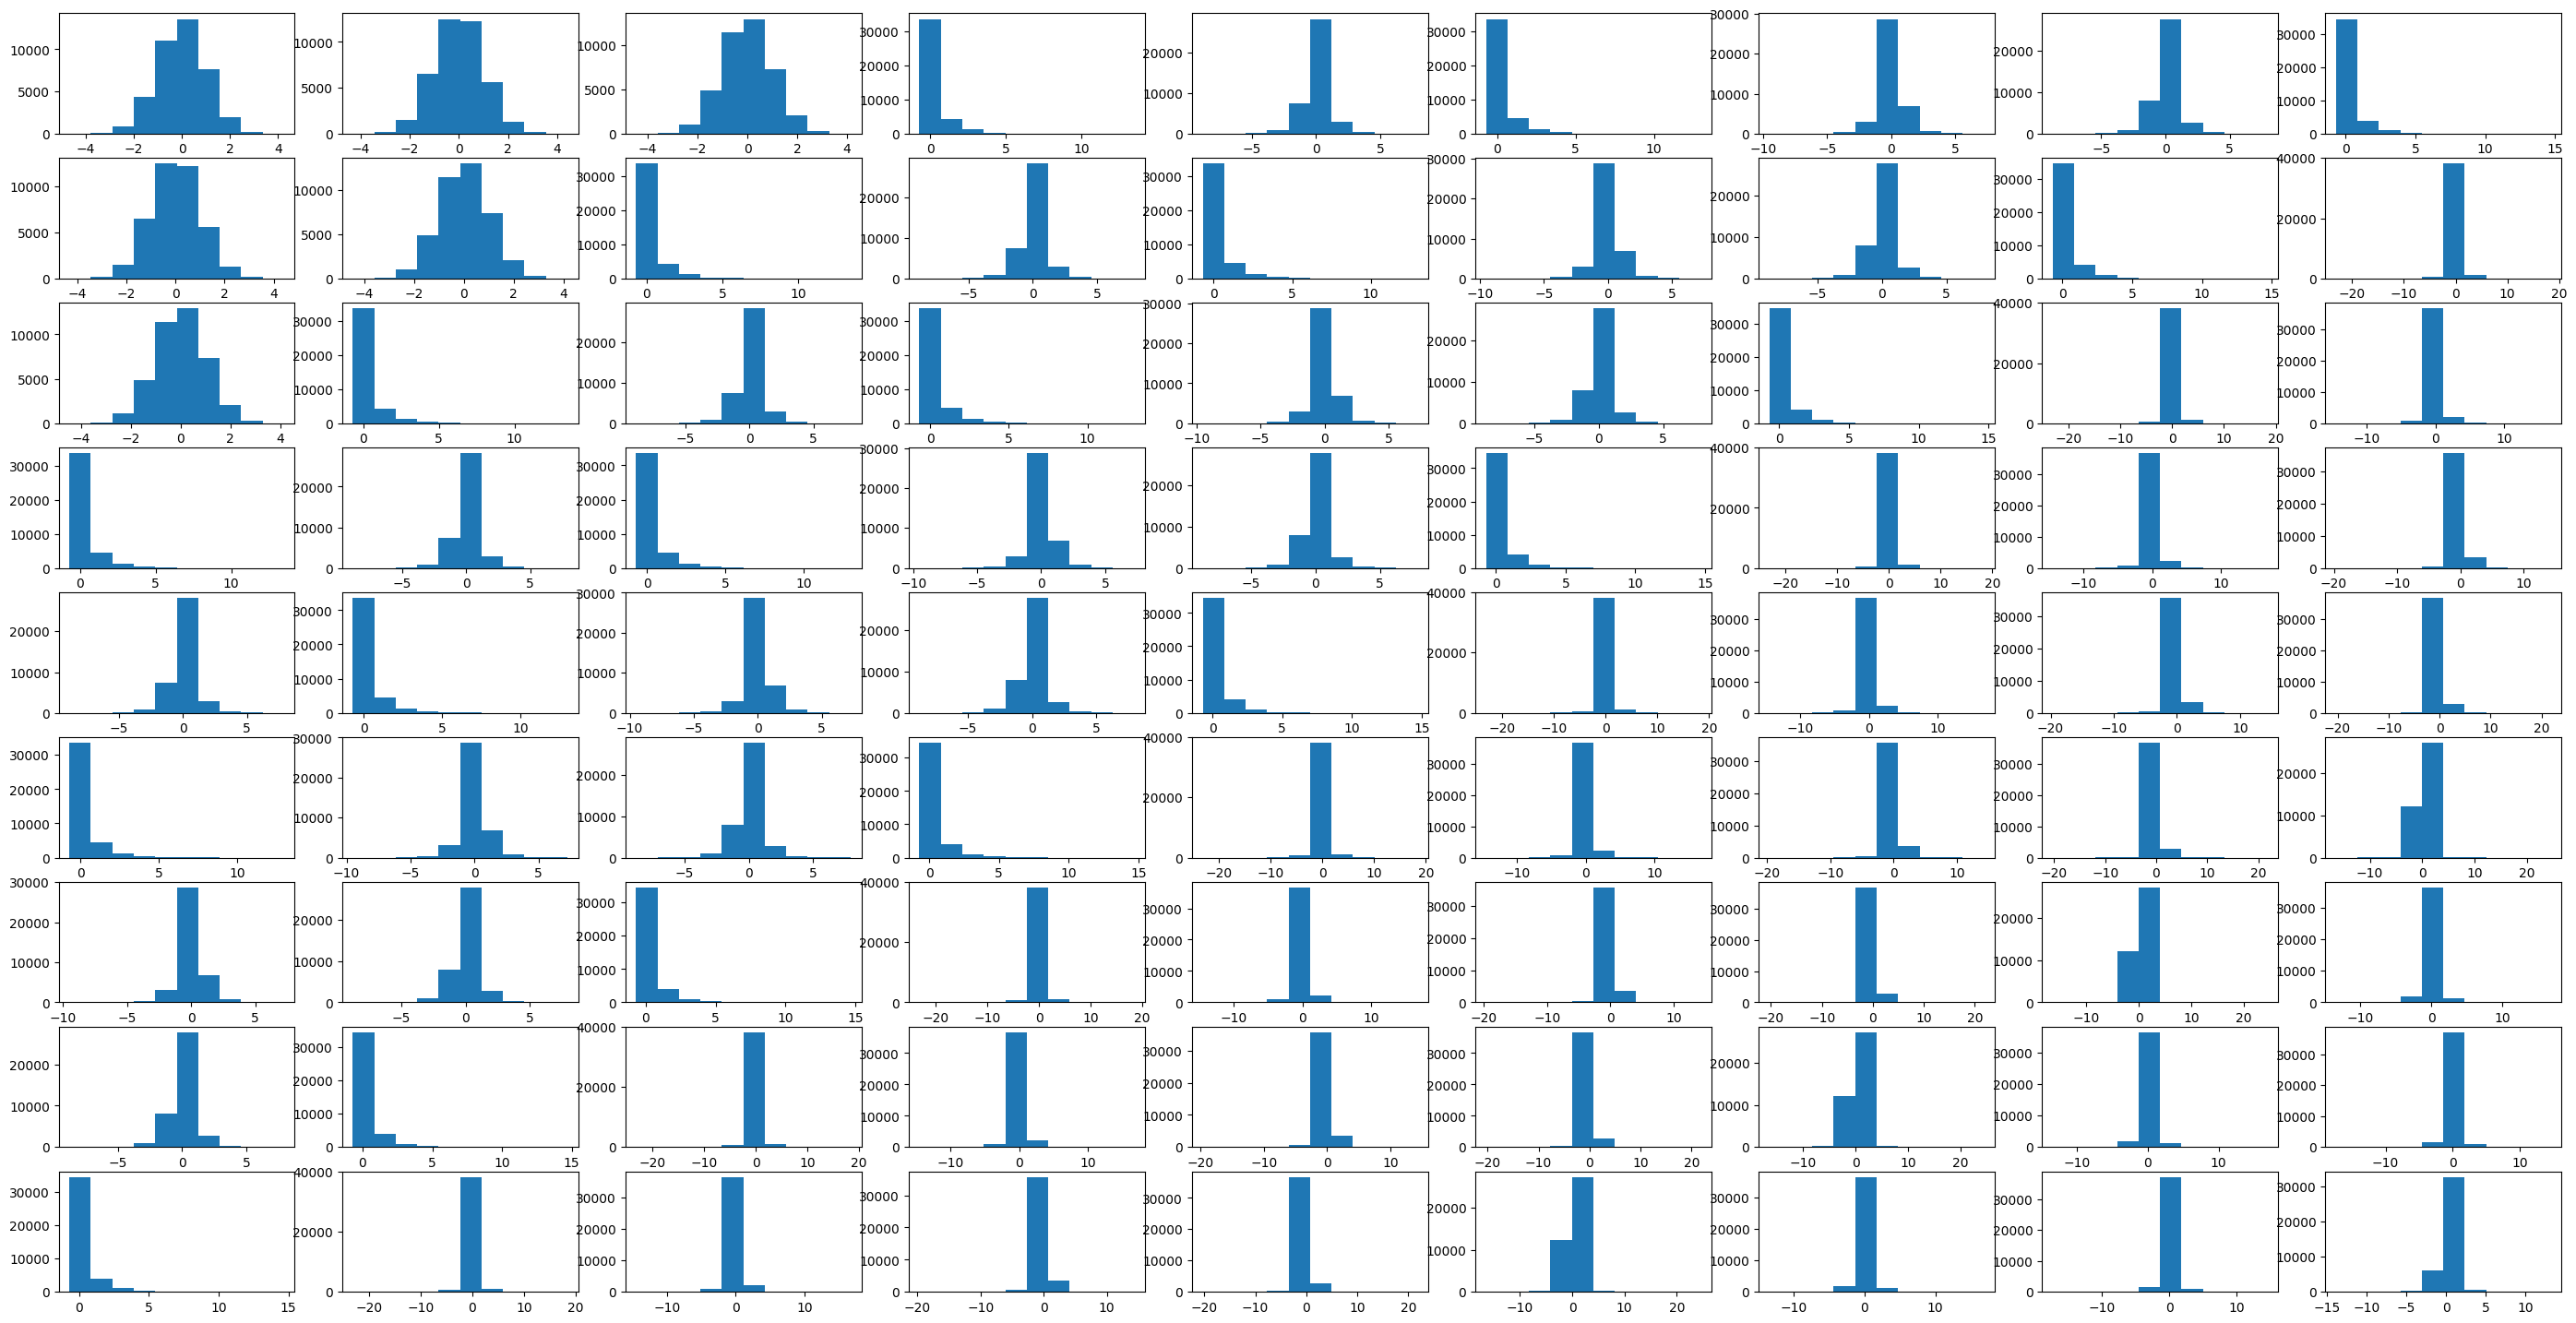

In [7]:
fig,ax=plt.subplots(nrows=9,ncols=9,figsize=(35,18))
for i in range(9):
    for j in range(9):
        ax[i,j].hist(model.X_train[:,i+j])

Initial Cost: 7.036e+13
Cost after iteration 1000: 5.455e+12
Cost after iteration 2000: 2.469e+12
Cost after iteration 3000: 1.499e+12
Cost after iteration 4000: 1.037e+12
Cost after iteration 5000: 7.770e+11
Cost after iteration 6000: 6.165e+11
Cost after iteration 7000: 5.106e+11
Cost after iteration 8000: 4.370e+11
Cost after iteration 9000: 3.832e+11
Cost after iteration 10000: 3.425e+11


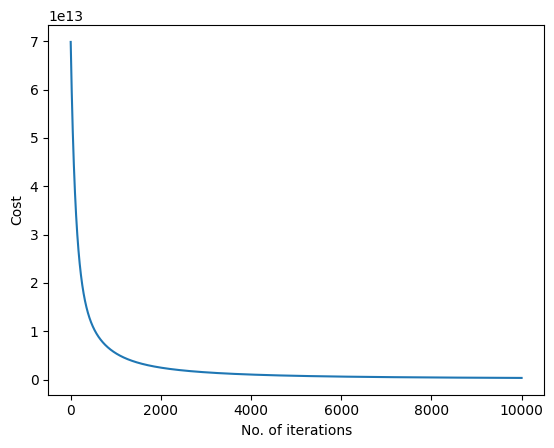

In [8]:
model.gradient_descent(alpha=0.001,num_iters=10000,lambda_=0)
model.plot_cost()

Initial Cost: 5.773e+13
Cost after iteration 1000: 1.839e+10
Cost after iteration 2000: 2.718e+09
Cost after iteration 3000: 4.214e+08
Cost after iteration 4000: 6.645e+07
Cost after iteration 5000: 1.062e+07
Cost after iteration 6000: 1.718e+06
Cost after iteration 7000: 2.809e+05
Cost after iteration 8000: 4.637e+04
Cost after iteration 9000: 7.719e+03
Cost after iteration 10000: 1.294e+03


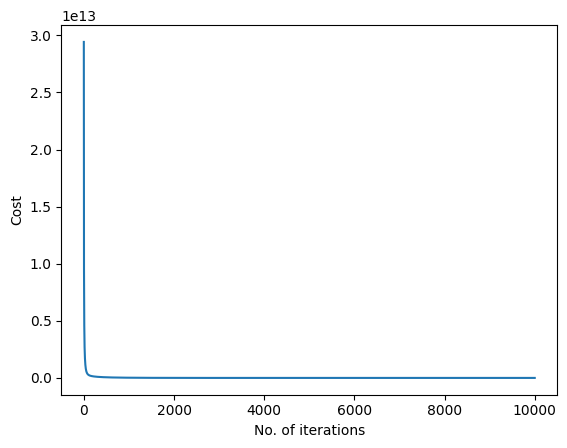

In [123]:
model=Polynomial_Regression(train_data,0.8,0.1,6)
model.gradient_descent(alpha=0.1,num_iters=10000,lambda_=0)
model.plot_cost()

Initial Cost: 7.354e+13
Cost after iteration 1000: 4.312e+08
Cost after iteration 2000: 1.489e+06
Cost after iteration 3000: 7.243e+03
Cost after iteration 4000: 5.084e+01
Cost after iteration 5000: 4.520e-01
Cost after iteration 6000: 4.477e-03
Cost after iteration 7000: 4.632e-05
Cost after iteration 8000: 4.878e-07
Cost after iteration 9000: 5.173e-09
Cost after iteration 10000: 5.502e-11
Cost after iteration 11000: 5.864e-13
Cost after iteration 12000: 6.481e-15
Cost after iteration 13000: 2.376e-16
Cost after iteration 14000: 1.699e-16
Cost after iteration 15000: 1.659e-16


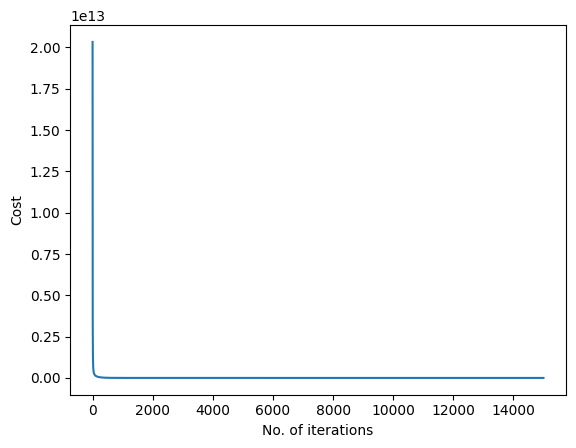

In [9]:
model=Polynomial_Regression(train_data,0.8,0.1,6)
model.gradient_descent(alpha=0.25,num_iters=15000,lambda_=0)
model.plot_cost()

In [10]:
model.ytrain_pred=model.prediction(model.X_train)
model.ycv_pred=model.prediction(model.X_cv)
model.ytest_pred=model.prediction(model.X_test)

In [11]:
print(f'Cost for cross validation dataset: {model.cost(model.X_cv,model.y_cv)}')

Cost for cross validation dataset: 9.77821219909002e-17


In [12]:
print(f'Cost for test dataset: {model.cost(model.X_test,model.y_test)}')

Cost for test dataset: 1.3125612713883578e-16


In [13]:
print(f'R^2 Score for training dataset: {model.R2_score(model.y_train,model.ytrain_pred)}')
print(f'R^2 Score for cross validation dataset: {model.R2_score(model.y_cv,model.ycv_pred)}')
print(f'R^2 Score for test dataset: {model.R2_score(model.y_test,model.ytest_pred)}')

R^2 Score for training dataset: 1.0
R^2 Score for cross validation dataset: 1.0
R^2 Score for test dataset: 1.0


In [22]:
test_data=pd.read_csv('Polynomialdata_test.csv')
test_data.head()

,ID,feature 1,feature 2,feature 3
0,16588,36.247643,-2.372704,43.835947
1,17513,5.903779,5.460086,-96.149414
2,14448,-37.298157,6.869786,-14.084487
3,13972,-40.080077,2.395066,-43.432941
4,18321,-20.417799,-2.194459,5.737226


In [23]:
test_x=test_data.iloc[:,1:].to_numpy()

In [24]:
p=np.array([[1,0,0],[0,1,0],[0,0,1]])
for n in range(2,7):
    t=[(u,v,w) for u in range(n+1) for v in range(n+1) for w in range(n+1) if (u+v+w==n)]
    t=np.array(t)
    p=np.concatenate((p,t),axis=0)
        
fnew=np.zeros((test_x.shape[0],len(p)))
for i in range(len(p)):
    x1=test_x[:,0]**p[i,0]
    x2=test_x[:,1]**p[i,1]
    x3=test_x[:,2]**p[i,2]
    fnew[:,i]=(x1*x2*x3)
df=pd.DataFrame(fnew)

In [25]:
test_x=df.iloc[:,:].to_numpy()
test_x=(test_x-model.mean)/model.std

In [26]:
test_y=model.prediction(test_x)

In [27]:
df = pd.DataFrame({'ID': test_data.iloc[:,0], 'label': test_y})
df.to_csv('result_polynomial.csv')